## Data Analysis on Algerian Forest Fire Dataset

#### Lifecycle of Machine Learning Project
1. Understanding the Problem Statement
2. Data Collection 
3. Exploratory Data Ananlysis
4. Data Cleaning
5. Data Pre-Processing
6. Model Training
7. Choose the best Model

### <span style='color:Blue'> 1) Problem Statment   </span>

    1. This dataset comprises information regarding fire in Algerian Forest
    2. We have to extract if there is some relation between rain, temperature, and occurence of forest fire 


### <span style='color:Blue'>  Reading the Data   </span>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("C:\Downloads\Algerian_forest_fires_dataset.csv",header=1)

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [4]:
df.iloc[120:126]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [5]:
df.shape

(246, 14)

### <span style='color:Blue'>  Encoding   </span>

In [6]:
# For 'Bejaia' region we have given region column '0' and for 'Sidi-Bel Abbes' region '1'

for index in range(df.shape[0]):
    if index<122:
        df.loc[index,'region']=0
    else:
        df.loc[index,'region']=1
        

In [7]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [8]:
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [9]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0


### <span style='color:Blue'>  Dropping the index not required   </span>

In [10]:
df.drop(df.index[122:124],axis=0,inplace=True)

In [11]:
df[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 30.5+ KB


### Observation:
There are lot of columns which needs to be converted to numeric 

### <span style='color:Blue'>  Correcting Column Names   </span>

In [13]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'region'],
      dtype='object')

In [14]:
df.rename(columns = {' RH':'RH', ' Ws':'Ws','Rain ':'Rain','Classes  ':'Classes'},inplace=True)

In [15]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

### <span style='color:Blue'>  Adding a new column fire   </span>

In [16]:
df['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', nan, 'not fire    '], dtype=object)

#### Observation
We have to remove white spaces from the data

In [17]:
df['Classes'].shape

(244,)

In [18]:
# there was a key error because we have deleted 2 columns above
df.reset_index(inplace=True)
df.drop(columns='index',inplace=True)

In [19]:
df.loc[122,"Classes"]

'not fire   '

In [20]:
df[df['Classes'].isnull()]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
165,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1.0


In [21]:
# replacing with 'fire' because it has been mistakenly enetered in 'FWI column'
df.loc[165,'Classes']='fire'

In [22]:
# removing white spaces from both side
for index in range(df['Classes'].shape[0]):
    df.loc[index,'Classes']=(df.loc[index,'Classes']).strip()

In [23]:
df["Classes"].unique()

array(['not fire', 'fire'], dtype=object)

In [24]:
pd.factorize(df['Classes'])

(array([0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 0], dtype=int64),
 Index(['not fire', 'fire'], dtype='object'))

In [25]:
# fire will be indicated by 1 and not fire by 0
df['Fire'] = pd.factorize(df['Classes'])[0]

In [26]:
# Verifying if encoding is correct or not
df.loc[52:62,]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,Fire
52,23,07,2012,27,66,22,0.4,68.2,10.5,71.3,1.8,15.4,2.1,not fire,0.0,0
53,24,07,2012,28,78,16,0.1,70,9.6,79.7,1.4,14.7,1.3,not fire,0.0,0
54,25,07,2012,31,65,18,0,84.3,12.5,88.7,4.8,18.5,7.3,fire,0.0,1
55,26,07,2012,36,53,19,0,89.2,17.1,98.6,10,23.9,15.3,fire,0.0,1
56,27,07,2012,36,48,13,0,90.3,22.2,108.5,8.7,29.4,15.3,fire,0.0,1
57,28,07,2012,33,76,15,0,86.5,24.4,117.8,5.6,32.1,11.3,fire,0.0,1
58,29,07,2012,32,73,15,0,86.6,26.7,127,5.6,35,11.9,fire,0.0,1
59,30,07,2012,31,79,15,0,85.4,28.5,136,4.7,37.4,10.7,fire,0.0,1
60,31,07,2012,35,64,17,0,87.2,31.9,145.7,6.8,41.2,15.7,fire,0.0,1
61,01,08,2012,36,45,14,0,78.8,4.8,10.2,2,4.7,0.9,not fire,0.0,0


In [27]:
# We will drop 'Classes' column because we have no use of it now
df.drop(columns='Classes',inplace=True)

In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Fire
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0.0,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0.0,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0.0,0


## <span style='color:Blue'>  Univariate Analysis   </span>
With `Data Cleaning` on the go


### 1) Day

In [29]:
df['day'].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [30]:
# Coverting the column to numeric type
df['day']=pd.to_numeric(df['day'])

In [31]:
df['day'].dtypes

dtype('int64')

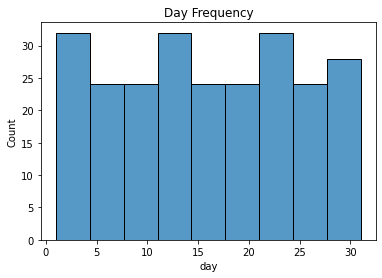

In [32]:
plt.title(label="Day Frequency")
sns.histplot(df['day'])
plt.show()

### 2) Month

In [33]:
df['month'].unique()

array(['06', '07', '08', '09'], dtype=object)

In [34]:
df['month']=pd.to_numeric(df['month'])

In [35]:
df['month'].dtypes

dtype('int64')

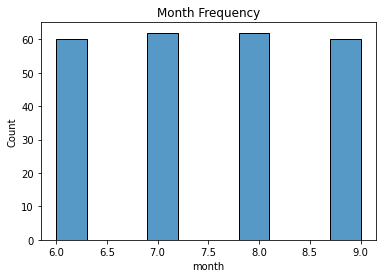

In [36]:
plt.title(label="Month Frequency")
sns.histplot(df['month'])
plt.show()

### 3) Year

In [37]:
df.year.unique()

array(['2012'], dtype=object)

#### Observation:
We can drop the year column because whole data is of 2012

In [38]:
df.drop(columns='year',inplace=True)

### 4) Temperature

In [39]:
df['Temperature'].unique()

array(['29', '26', '25', '27', '31', '33', '30', '28', '32', '34', '35',
       '36', '37', '22', '24', '38', '39', '40', '42'], dtype=object)

In [40]:
df['Temperature']=pd.to_numeric(df['Temperature'])

In [41]:
df['Temperature'].dtypes

dtype('int64')

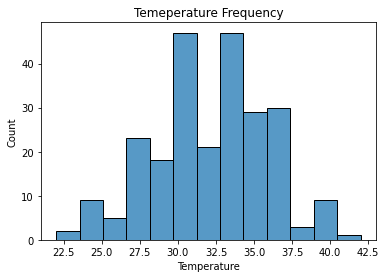

In [42]:
plt.title(label="Temeperature Frequency")
sns.histplot(df['Temperature'])
plt.show()

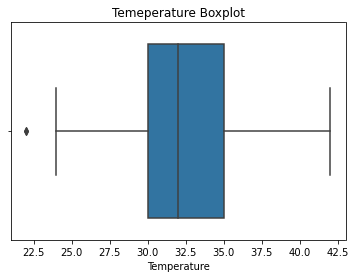

In [43]:
plt.title(label="Temeperature Boxplot")
sns.boxplot(x=df['Temperature'])
plt.show()

In [44]:
# Two outliers
df[df['Temperature']<24]

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Fire
93,2,9,22,86,15,10.1,30.5,0.7,7,0,1.1,0,0.0,0
105,14,9,22,76,26,8.3,47.4,1.1,7,0.4,1.6,0.1,0.0,0


### 4) Relative Humidity

In [45]:
df['RH'].unique()

array(['57', '61', '82', '89', '77', '67', '54', '73', '88', '79', '65',
       '81', '84', '78', '80', '55', '62', '66', '64', '53', '47', '50',
       '68', '75', '76', '63', '69', '70', '59', '48', '45', '60', '51',
       '52', '58', '86', '74', '71', '49', '44', '41', '42', '90', '87',
       '72', '46', '37', '36', '56', '43', '83', '29', '34', '33', '35',
       '39', '31', '21', '40', '24', '38', '26'], dtype=object)

In [46]:
df['RH']=pd.to_numeric(df['RH'])

In [47]:
df['Temperature'].dtypes

dtype('int64')

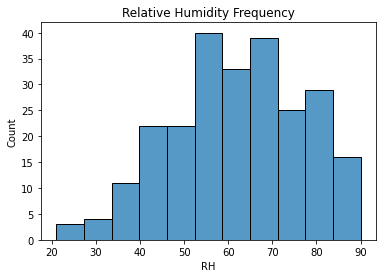

In [48]:
plt.title(label="Relative Humidity Frequency")
sns.histplot(df['RH'])
plt.show()

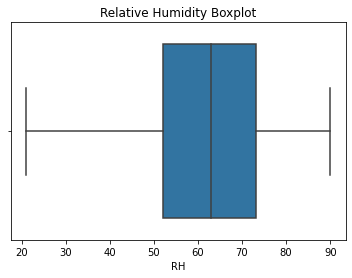

In [49]:
plt.title(label="Relative Humidity Boxplot")
sns.boxplot(x=df['RH'])
plt.show()

### 5) Wind Speed

In [50]:
df['Ws'].unique()

array(['18', '13', '22', '16', '14', '15', '12', '19', '21', '20', '17',
       '26', '11', '10', '9', '8', '6', '29'], dtype=object)

In [51]:
df['Ws']=pd.to_numeric(df['Ws'])

In [52]:
df['Temperature'].dtypes

dtype('int64')

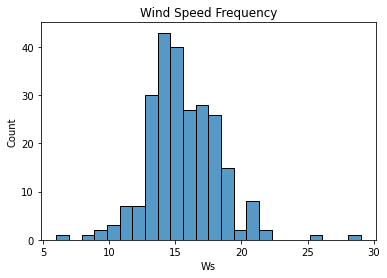

In [53]:
plt.title(label="Wind Speed Frequency")
sns.histplot(df['Ws'])
plt.show()

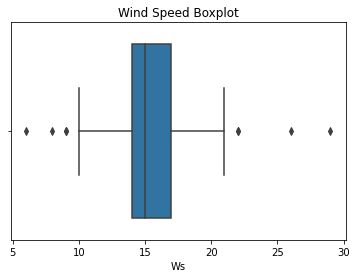

In [54]:
plt.title(label="Wind Speed Boxplot")
sns.boxplot(x=df['Ws'])
plt.show()

### `Observation`:
Outliers on the right side may be representing a bad weather condition

### 6) Rain

In [55]:
df['Rain'].unique()

array(['0', '1.3', '13.1', '2.5', '0.2', '1.2', '0.5', '3.1', '0.7',
       '0.6', '0.3', '0.1', '0.4', '1', '1.4', '0.8', '16.8', '7.2',
       '10.1', '3.8', '0.9', '1.8', '4.6', '8.3', '5.8', '4', '2', '4.7',
       '8.7', '4.5', '1.1', '1.7', '2.2', '6', '1.9', '2.9', '4.1', '6.5',
       '4.4'], dtype=object)

In [56]:
df['Rain']=pd.to_numeric(df['Rain'])

In [57]:
df['Rain'].unique()

array([ 0. ,  1.3, 13.1,  2.5,  0.2,  1.2,  0.5,  3.1,  0.7,  0.6,  0.3,
        0.1,  0.4,  1. ,  1.4,  0.8, 16.8,  7.2, 10.1,  3.8,  0.9,  1.8,
        4.6,  8.3,  5.8,  4. ,  2. ,  4.7,  8.7,  4.5,  1.1,  1.7,  2.2,
        6. ,  1.9,  2.9,  4.1,  6.5,  4.4])

In [58]:
df['Rain'].dtypes

dtype('float64')

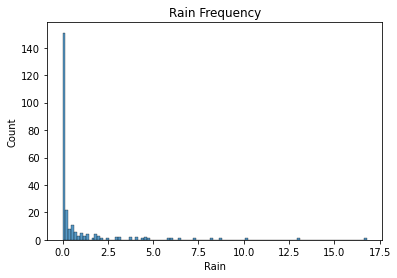

In [59]:
plt.title(label="Rain Frequency")
sns.histplot(df['Rain'])
plt.show()

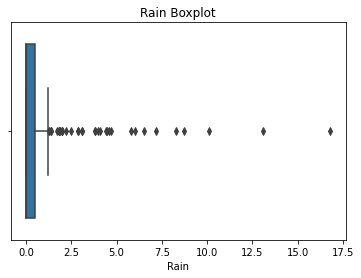

In [60]:
plt.title(label="Rain Boxplot")
sns.boxplot(x=df['Rain'])
plt.show()

### `Observation`:
Most of the time there is no rain that's why majority of data points are concentrated towards 0

### 7) Fine Fuel Moisture Code (FFMC)
FFMC is a numerical rating of the moisture content of litter and cured fine fuels and is derived from temperature, relative humidity, wind and rain

In [61]:
df['FFMC'].unique()

array(['65.7', '64.4', '47.1', '28.6', '64.8', '82.6', '88.2', '86.6',
       '52.9', '73.2', '84.5', '84', '50', '59', '49.4', '36.1', '37.3',
       '56.9', '79.9', '59.8', '81', '79.1', '81.4', '85.9', '86.7',
       '86.8', '89', '89.1', '88.7', '59.9', '55.7', '63.1', '80.1', '87',
       '80', '85.6', '66.6', '81.1', '75.1', '81.8', '73.9', '60.7',
       '72.6', '82.8', '85.4', '88.1', '73.4', '68.2', '70', '84.3',
       '89.2', '90.3', '86.5', '87.2', '78.8', '78', '76.6', '85', '86.4',
       '77.1', '87.4', '88.9', '81.3', '82.4', '80.2', '89.3', '89.4',
       '88.3', '88.6', '89.5', '85.8', '84.9', '90.1', '72.7', '52.5',
       '46', '30.5', '42.6', '68.4', '80.8', '75.8', '69.6', '62', '56.1',
       '58.5', '71', '40.9', '47.4', '44.9', '78.1', '87.7', '83.8',
       '87.8', '77.8', '73.7', '68.3', '48.6', '82', '85.7', '77.5', '45',
       '57.1', '48.7', '79.4', '83.7', '71.4', '90.6', '72.3', '53.4',
       '66.8', '62.2', '65.5', '64.6', '60.2', '86.2', '78.3', '74.

In [62]:
df['FFMC']=pd.to_numeric(df['FFMC'])

In [63]:
df['FFMC'].dtypes

dtype('float64')

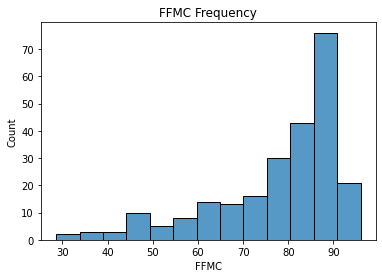

In [64]:
plt.title(label="FFMC Frequency")
sns.histplot(df['FFMC'])
plt.show()

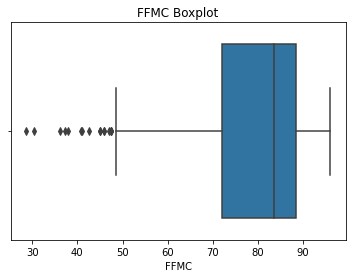

In [65]:
plt.title(label="FFMC Boxplot")
sns.boxplot(x=df['FFMC'])
plt.show()

### 8) DMC (Duff Moisture Code)
The Duff Moisture Code (DMC) is a numeric rating of the average moisture content of loosely compacted organic layers of moderate depth. This code gives an indication of fuel consumption in moderate duff layers and medium-size woody material.

In [66]:
df['DMC'].unique()

array(['3.4', '4.1', '2.5', '1.3', '3', '5.8', '9.9', '12.1', '7.9',
       '9.5', '12.5', '13.8', '6.7', '4.6', '1.7', '1.1', '1.9', '4.5',
       '6.3', '7', '8.2', '11.2', '14.2', '17.8', '21.6', '25.5', '18.4',
       '22.9', '2.4', '2.6', '7.6', '10.9', '9.7', '7.7', '6', '8.1',
       '7.8', '5.2', '9.4', '12', '12.3', '18.5', '16.4', '10.5', '9.6',
       '17.1', '22.2', '24.4', '26.7', '28.5', '31.9', '4.8', '5.7',
       '11.1', '13', '15.5', '11.3', '14.8', '18.6', '21.7', '15.6', '19',
       '11.7', '16', '20', '23.2', '25.9', '29.6', '33.5', '37.6', '40.5',
       '43.9', '45.6', '47', '50.2', '54.2', '25.2', '8.7', '0.7', '1.2',
       '3.6', '3.2', '2.1', '2.2', '0.9', '6.4', '9.8', '13.5', '16.5',
       '10.6', '5.5', '8.3', '7.1', '2.9', '2.7', '8.4', '8.5', '13.3',
       '18.2', '21.3', '11.4', '7.2', '4.2', '3.9', '4.4', '3.8', '10',
       '12.8', '20.9', '27.2', '17.9', '13.6', '18.7', '8', '12.6',
       '12.9', '18', '19.4', '21.1', '23.9', '27.8', '32.7', '39.

In [67]:
df['DMC']=pd.to_numeric(df['DMC'])

In [68]:
df['DMC'].dtypes

dtype('float64')

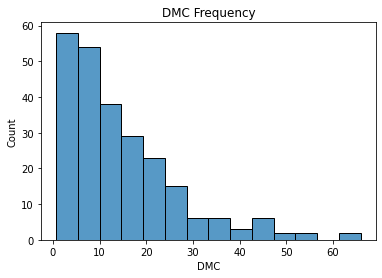

In [69]:
plt.title(label="DMC Frequency")
sns.histplot(df['DMC'])
plt.show()

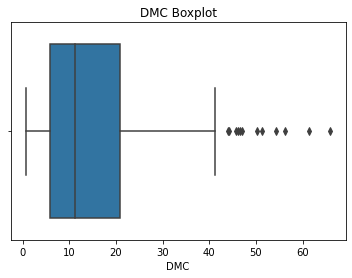

In [70]:
plt.title(label="DMC Boxplot")
sns.boxplot(x=df['DMC'])
plt.show()

### 9) DC (drought code)
The Drought Code (DC) is a numeric rating of the average moisture content of deep, compact organic layers.

In [71]:
df['DC'].unique()

array(['7.6', '7.1', '6.9', '14.2', '22.2', '30.5', '38.3', '38.8',
       '46.3', '54.3', '61.4', '17', '7.8', '7.4', '8', '16', '27.1',
       '31.6', '39.5', '47.7', '55.8', '63.8', '71.8', '80.3', '88.5',
       '84.4', '92.8', '8.6', '8.3', '9.2', '18.5', '27.9', '37', '40.4',
       '49.8', '9.3', '18.7', '27.7', '37.2', '22.9', '25.5', '34.1',
       '43.1', '52.8', '62.1', '71.5', '79.9', '71.3', '79.7', '88.7',
       '98.6', '108.5', '117.8', '127', '136', '145.7', '10.2', '10',
       '19.8', '29.7', '39.1', '48.6', '47', '57', '67', '77', '75.1',
       '85.1', '94.7', '92.5', '90.4', '100.7', '110.9', '120.9', '130.6',
       '141.1', '151.3', '161.5', '171.3', '181.3', '190.6', '200.2',
       '210.4', '220.4', '180.4', '8.7', '7.5', '7', '15.7', '24', '32.2',
       '30.1', '8.4', '8.9', '16.6', '7.3', '24.3', '33.1', '41.3',
       '49.3', '57.9', '41.4', '30.4', '15.2', '7.7', '16.3', '24.9',
       '8.8', '8.2', '15.4', '17.6', '26.3', '28.9', '14.7', '22.5',
       '

In [72]:
df['DC']=pd.to_numeric(df['DC'])

ValueError: Unable to parse string "14.6 9" at position 165

In [76]:
df.loc[165,'DC']=14.6

In [77]:
df['DC']=pd.to_numeric(df['DC'])

In [80]:
df['DC'].dtypes

dtype('float64')

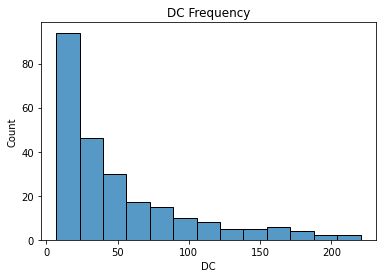

In [82]:
plt.title(label="DC Frequency")
sns.histplot(df['DC'])
plt.show()

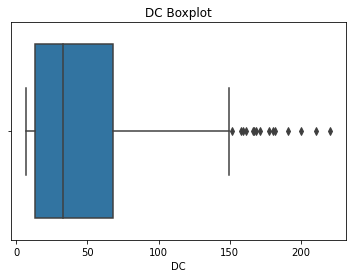

In [81]:
plt.title(label="DC Boxplot")
sns.boxplot(x=df['DC'])
plt.show()

### 10) ISI (Initial Spread Index)
The Initial Spread Index (ISI) is a numeric rating of the expected rate of fire spread. It is based on wind speed and FFMC

In [83]:
df['ISI'].unique()

array(['1.3', '1', '0.3', '0', '1.2', '3.1', '6.4', '5.6', '0.4', '4',
       '4.8', '0.5', '0.7', '2.5', '0.9', '2.6', '2.4', '3.3', '5.7',
       '6.7', '9.2', '7.6', '2.2', '7.2', '1.1', '0.8', '2.7', '2.8', '6',
       '1.5', '3', '1.4', '3.2', '4.6', '7.7', '5.2', '1.8', '10', '8.7',
       '4.7', '6.8', '2', '1.7', '5.5', '6.9', '7.4', '7.1', '5.9', '3.7',
       '9.7', '8.8', '9.9', '10.4', '9', '8.2', '4.4', '7.3', '12.5',
       '0.6', '0.2', '0.1', '2.1', '1.9', '6.2', '7.8', '4.5', '5.4',
       '8.4', '13.4', '5', '1.6', '4.9', '7', '8', '11.7', '11.3', '4.3',
       '4.1', '8.3', '4.2', '10.9', '9.5', '18.5', '13.2', '13.8', '17.2',
       '15.7', '19', '9.6', '16.6', '15.5', '7.5', '10.8', '3.5', '16',
       '3.8', '5.1', '11.5', '12.2', '14.3', '13.1', '8.1', '9.8', '9.1',
       '14.2', '11.2'], dtype=object)

In [84]:
df['ISI']=pd.to_numeric(df['ISI'])

In [85]:
df['ISI'].dtypes

dtype('float64')

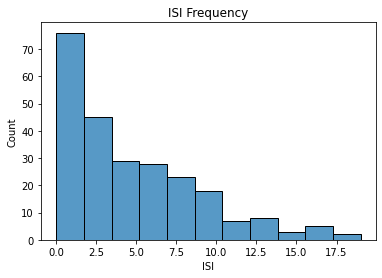

In [86]:
plt.title(label="ISI Frequency")
sns.histplot(df['ISI'])
plt.show()

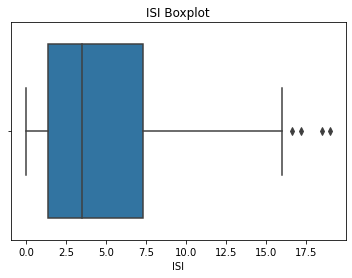

In [87]:
plt.title(label="ISI Boxplot")
sns.boxplot(x=df['ISI'])
plt.show()

### 11) BUI (Buildup Index)
The Build Up Index (BUI) is a numeric rating of the total amount of fuel available for combustion

In [88]:
df['BUI'].unique()

array(['3.4', '3.9', '2.7', '1.7', '7', '10.9', '13.5', '10.5', '12.6',
       '15.8', '17.7', '6.7', '4.4', '3', '2.2', '1.6', '2.4', '5.3',
       '5.1', '8.4', '9.7', '11.5', '14.9', '18.3', '21.6', '25.8',
       '29.7', '23.8', '28.3', '2.9', '2.8', '5.7', '9.1', '12.5', '12.1',
       '15.4', '7.4', '5.8', '8.1', '9.2', '11.7', '5.9', '8.3', '11.1',
       '14.2', '18.2', '16.5', '22.4', '21.7', '14.7', '18.5', '23.9',
       '29.4', '32.1', '35', '37.4', '41.2', '4.7', '5.5', '8.2', '17.2',
       '14.1', '17.9', '21.9', '25.5', '20.7', '24.4', '27.2', '22',
       '17.6', '22.9', '27.5', '31.3', '34.7', '38.8', '43.1', '47.5',
       '50.9', '54.7', '57.1', '59.3', '62.9', '67.4', '1.8', '1.1',
       '5.6', '2.6', '3.7', '1.4', '4.2', '7.7', '11.3', '16', '19.2',
       '12.9', '9.6', '6.2', '9', '6.8', '6.5', '9.3', '10.7', '7.3',
       '13.1', '18', '21.2', '6.1', '7.1', '4.1', '3.8', '9.9', '12.7',
       '16.4', '20.8', '27.1', '17.8', '3.3', '7.8', '10.3', '18.7',
      

In [89]:
df['BUI']=pd.to_numeric(df['BUI'])

In [90]:
df['BUI'].dtypes

dtype('float64')

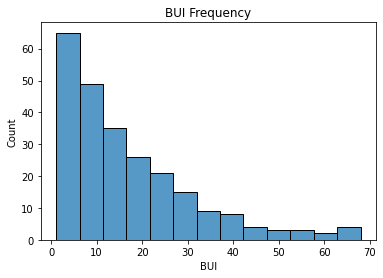

In [92]:
plt.title(label="BUI Frequency")
sns.histplot(df['BUI'])
plt.show()

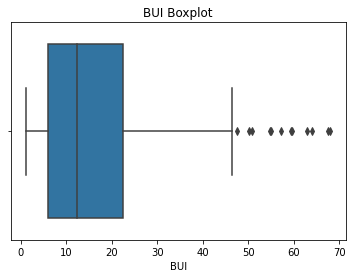

In [91]:
plt.title(label="BUI Boxplot")
sns.boxplot(x=df['BUI'])
plt.show()

### 12) FWI (fire weather index)
The Fire Weather Index (FWI) integrates current ISI and BUI to produce a unitless index of general fire intensity potential

In [95]:
df['FWI'].unique()

array(['0.5', '0.4', '0.1', '0', '2.5', '7.2', '7.1', '0.3', '0.9', '5.6',
       '7.1 ', '0.2', '1.4', '2.2', '2.3', '3.8', '7.5', '8.4', '10.6',
       '15', '13.9', '3.9', '12.9', '1.7', '4.9', '6.8', '3.2', '8',
       '0.6', '3.4', '0.8', '3.6', '6', '10.9', '4', '8.8', '2.8', '2.1',
       '1.3', '7.3', '15.3', '11.3', '11.9', '10.7', '15.7', '6.1', '2.6',
       '9.9', '11.6', '12.1', '4.2', '10.2', '6.3', '14.6', '16.1',
       '17.2', '16.8', '18.4', '20.4', '22.3', '20.9', '20.3', '13.7',
       '13.2', '19.9', '30.2', '5.9', '7.7', '9.7', '8.3', '0.7', '4.1',
       '1', '3.1', '1.9', '10', '16.7', '1.2', '5.3', '6.7', '9.5', '12',
       '6.4', '5.2', '3', '9.6', '4.7', 'fire   ', '14.1', '9.1', '13',
       '17.3', '30', '25.4', '16.3', '9', '14.5', '13.5', '19.5', '12.6',
       '12.7', '21.6', '18.8', '10.5', '5.5', '14.8', '24', '26.3',
       '12.2', '18.1', '24.5', '26.9', '31.1', '30.3', '26.1', '16',
       '19.4', '2.7', '3.7', '10.3', '5.7', '9.8', '19.3', '17.5',

In [105]:
df['FWI']=pd.to_numeric(df['FWI'])

In [103]:
df.loc[165,'FWI']=np.nan

In [110]:
df.loc[165,'FWI']=df['FWI'].median()

In [111]:
df['FWI'].dtypes

dtype('float64')

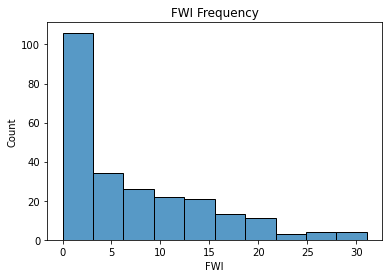

In [112]:
plt.title(label="FWI Frequency")
sns.histplot(df['FWI'])
plt.show()

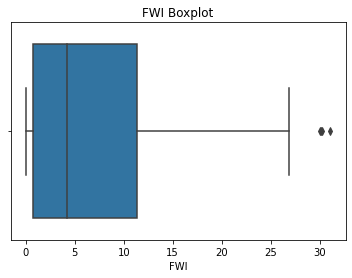

In [113]:
plt.title(label="FWI Boxplot")
sns.boxplot(x=df['FWI'])
plt.show()

### 13) Region

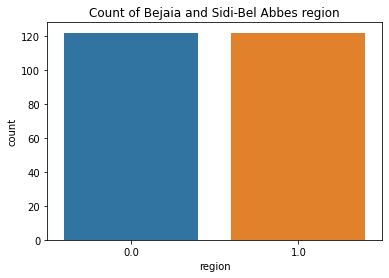

In [118]:
plt.title(label="Count of Bejaia and Sidi-Bel Abbes region")
sns.countplot(x=df['region'])
plt.show()

### 14) Fire

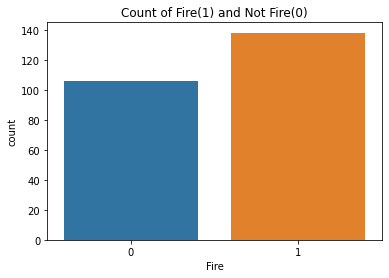

In [121]:
plt.title(label="Count of Fire(1) and Not Fire(0)")
sns.countplot(x=df['Fire'])
plt.show()

## <span style='color:Blue'>  Multivariate Analysis   </span>
On 'Fire' column

In [122]:
df.columns

Index(['day', 'month', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC',
       'ISI', 'BUI', 'FWI', 'region', 'Fire'],
      dtype='object')

In [204]:
df.corr()

,day,month,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,region,Fire
day,1.000000e+00,2.232788e-17,0.095772,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.527929,0.177727,0.517229,0.350960,4.662229e-16,0.201784
month,2.232788e-17,1.000000e+00,-0.059017,-0.037884,-0.041447,0.035322,0.015577,0.068178,0.127672,0.061680,0.085822,0.083285,-9.586232e-17,0.022333
Temperature,9.577222e-02,-5.901677e-02,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.562344,2.734961e-01,0.518119
RH,-7.420934e-02,-3.788419e-02,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.574773,-4.064239e-01,-0.435023
Ws,4.700086e-02,-4.144673e-02,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.030910,-1.768290e-01,-0.066529
Rain,-1.122654e-01,3.532207e-02,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.323831,-4.108006e-02,-0.379449
FFMC,2.240321e-01,1.557668e-02,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.688876,2.246798e-01,0.770114
DMC,4.915710e-01,6.817778e-02,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.875791,1.910937e-01,0.584188
DC,5.279285e-01,1.276719e-01,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.739633,-8.148947e-02,0.507122
ISI,1.777266e-01,6.168011e-02,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.913163,2.684206e-01,0.735511


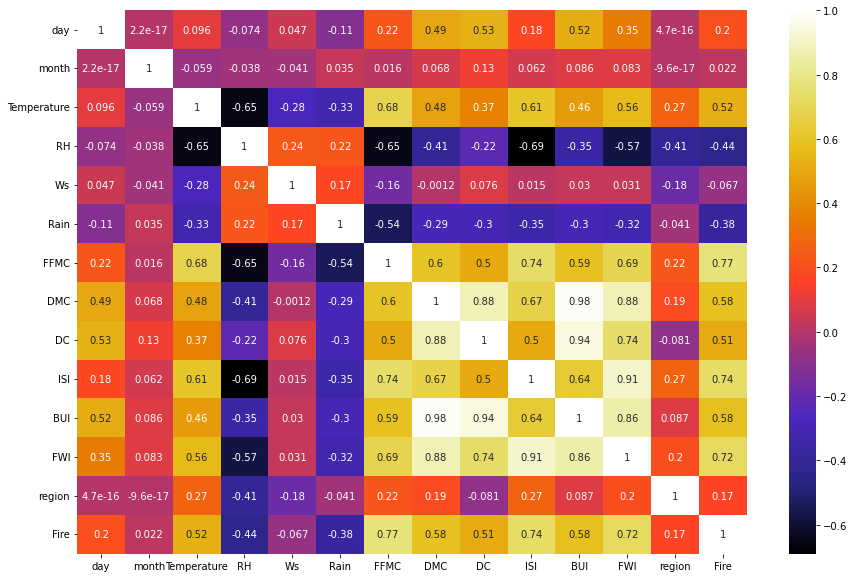

In [208]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='CMRmap')
plt.show()

### Relation of other variable with 'Rain'

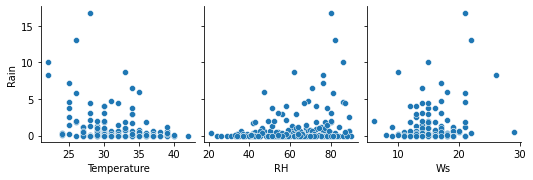

In [137]:
sns.pairplot(data=df, x_vars=['Temperature', 'RH', 'Ws'], y_vars=['Rain'])
plt.show()

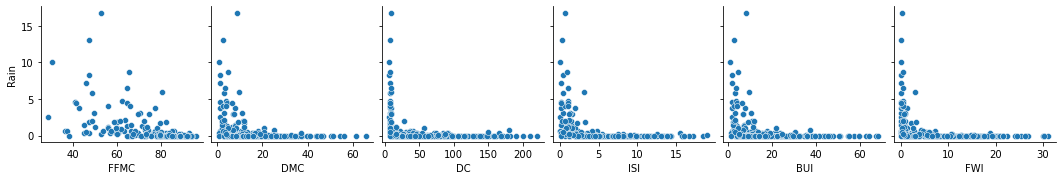

In [136]:
sns.pairplot(data=df, x_vars=['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'], y_vars=['Rain'])
plt.show()

### Relation of other variable with 'Temperature'

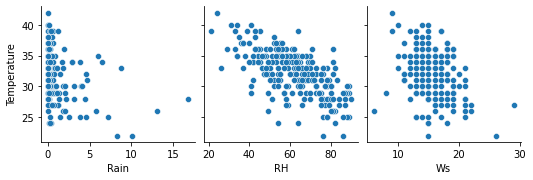

In [139]:
sns.pairplot(data=df, x_vars=['Rain', 'RH', 'Ws'], y_vars=['Temperature'])
plt.show()

### Observation:
Temperature is <b>negatively correlated</b> with 'RH' and 'Ws'

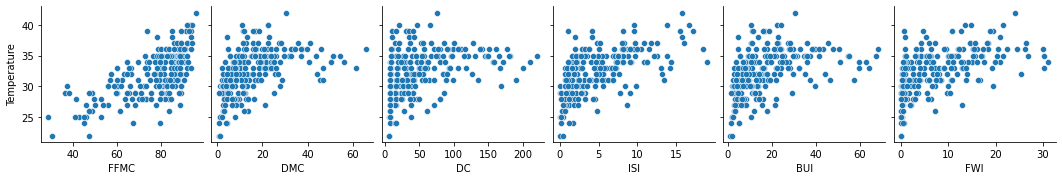

In [138]:
sns.pairplot(data=df, x_vars=['FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'], y_vars=['Temperature'])
plt.show()

### Observation:
Temperature is <b>positively correlated</b> with 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'

In [198]:
# 'Bejaia' region: 0 & 'Sidi-Bel Abbes' region: 1
pd.DataFrame(df.groupby('region')['Fire'].value_counts())

Fire
region Fire      
0.0    0       63
       1       59
1.0    1       79
       0       43

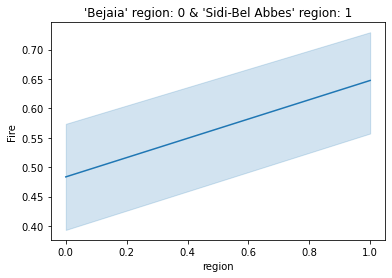

In [153]:
plt.title(label="'Bejaia' region: 0 & 'Sidi-Bel Abbes' region: 1")
sns.lineplot(data=df, x='region', y='Fire')
plt.show()

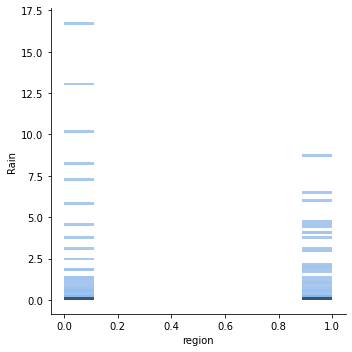

In [155]:
sns.displot(data=df, x='region', y='Rain')
plt.show()

### Observation:
1. <b>'Bejaia'</b> region has <b>more Rainfall</b> therefore it has <b>less fire</b>
2. <b>'Sidi-Bel Abbes'</b> region has <b>less Rainfall</b> therefore it has <b>more fire</b>

### <span style='color:Blue'>  Summary </span>
1. ['RH', 'Ws', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'] can be used to predict the Fire 
2. Rainfall can be one of the reason for less forest fire
